In [26]:
# Basic Python package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string 
import re

In [2]:
#importing the required file
train_file_path = r'F:\moVies\Springboard\data\ghc_train.tsv'
test_file_path = r'F:\moVies\Springboard\data\ghc_test.tsv'
train_df = pd.read_csv(train_file_path, sep='\t')
test_df = pd.read_csv(test_file_path, sep='\t')

In [3]:
#To know are the columns in our dataset
# Columns: Assault on Human Dignity (hd), Calls for Violence (cv), Vulgarity/Offensive Language directed at an individual (vo)
train_df.columns

Index(['text', 'hd', 'cv', 'vo'], dtype='object')

In [4]:
#Top 10 rows in our dataset
train_df.head(10)

,text,hd,cv,vo
0,He most likely converted to islam due to his n...,0,0,0
1,So Ford lied about being a psychologist. Recor...,0,0,0
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0
3,"I share a lot of your values, & like many who ...",0,0,0
4,I am so ready to get back to blogging! www.ben...,0,0,0
5,taking a look at new opportunity called FX Pro...,0,0,0
6,Reflecting back when I was in school with Spec...,0,0,0
7,"Let's be honest everyone, last year there were...",0,0,0
8,2007 Nuke plant in Syria,0,0,0
9,NBC's Chuck Todd Thinks He's Figured It All Ou...,0,0,0


In [5]:
#Bottom 10 rows in our dataset
train_df.tail(10)

,text,hd,cv,vo
22026,What does Gab-Pro give ya?,0,0,0
22027,#354 TRUMP POLLS VS MEDIA MELTDOWN! | Jordan P...,0,0,0
22028,The Founders never EVER dealt with a group tha...,0,0,0
22029,Man [homosexually] molests 15-year-old boy on ...,0,0,0
22030,So I saw #Skyscraper for you #GabFam. Now I ha...,0,0,0
22031,"I'm a fan of western civilization, and one bed...",0,0,0
22032,Or ... is she saying that Muslims don't know h...,0,0,0
22033,Thank you to all my followers that follow me e...,0,0,0
22034,Wednesday music. https://www.youtube.com/watch...,0,0,0
22035,This is a really Big Surprise! https://www.wn...,0,0,0


In [6]:
#Describe function to find total count,etc
train_df.describe()

,hd,cv,vo
count,22036.000000,22036.000000,22036.000000
mean,0.084271,0.005945,0.062579
std,0.277800,0.076875,0.242210
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [7]:
#how many nulls 
print(train_df.isnull().sum())

text    0
hd      0
cv      0
vo      0
dtype: int64


In [8]:
#in our case we have no null values as inferred from output on line 12
#how does the data look like
print(train_df.shape)#total rows x column count 
print("\n")
print(train_df.dtypes)# each column data type

(22036, 4)


text    object
hd       int64
cv       int64
vo       int64
dtype: object


In [9]:
#info gives count and datatype of it
train_df.info()
print('_'*40) #prints a separator line consisting of 40 underscores
test_df.info() #displays a concise summary of DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22036 entries, 0 to 22035
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22036 non-null  object
 1   hd      22036 non-null  int64 
 2   cv      22036 non-null  int64 
 3   vo      22036 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 688.8+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5510 entries, 0 to 5509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5510 non-null   object
 1   hd      5510 non-null   int64 
 2   cv      5510 non-null   int64 
 3   vo      5510 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 172.3+ KB


In [10]:
#finding duplicates
train_df.duplicated().sum()

72

In [11]:
#output on line 27 shows our dataset has 72 duplicate values
#now to see which values are duplicate 
duplicate_rows = train_df[train_df.duplicated()]
print(duplicate_rows)


                                                    text  hd  cv  vo
3896                           I see what you did there.   0   0   0
5426                                                Lol!   0   0   0
5661   This is the amount of money necessary to buy t...   0   0   1
6036   Just posted 1st of 3 final 'controversial' (in...   0   0   0
6334                                            Maverick   0   0   0
...                                                  ...  ..  ..  ..
21122  GOD BLESS OUR INCREDIBLE PRESIDENT! RED TIDAL ...   0   0   0
21407                                                  .   0   0   0
21460                                       @Heartiste     0   0   0
21531                   Worst. Strategic. Mistake. EVER.   0   0   0
21976  SARA CARTER: John Kerry Officially Under Inves...   0   0   0

[72 rows x 4 columns]


In [12]:
# removing the duplicates and keeing just the first occurrence
train_df = train_df.drop_duplicates()


In [13]:
#again checking for duplicates 
train_df.duplicated().sum()

0

In [14]:
#output 0 on line 30 shows that now our dataset has no duplicate values 
#identifying garbage values (garbage values have "object" as their datatype)
for i in train_df.select_dtypes(include="object").columns:
    print(train_df[i].value_counts())
    print("***"*10)

text
'A confidential, 49-page memo for defeating Trump by working with the major social-media platforms to eliminate “right wing propaganda and fake news” was presented in January 2017  by Media Matters founder David Brock at a retreat in Florida with about 100 donors, the Washington Free Beacon reported at the time.' https://www.wnd.com/2018/08/mask-off-social-media-... #FAGS #So...    2
He most likely converted to islam due to his nature being suitable for  islamic doctrine. "Prophet" Muhammad was a psychopath.                                                                                                                                                                                                                                                                   1
The other way around! Just go to Birmingham or London!                                                                                                                                                                       

In [15]:
#Exploratory Data Analysis (EDA)
#descriptive statistics 
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hd,21964.0,0.084456,0.278077,0.0,0.0,0.0,0.0,1.0
cv,21964.0,0.005964,0.077000,0.0,0.0,0.0,0.0,1.0
vo,21964.0,0.062693,0.242416,0.0,0.0,0.0,0.0,1.0


In [16]:
train_df.describe(include="object")

,text
count,21964
unique,21963
top,"'A confidential, 49-page memo for defeating Tr..."
freq,2


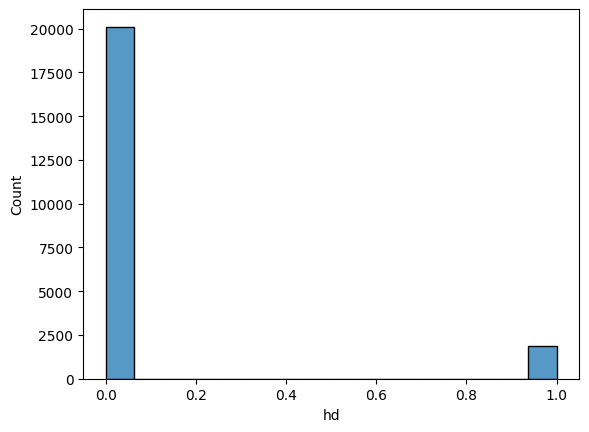

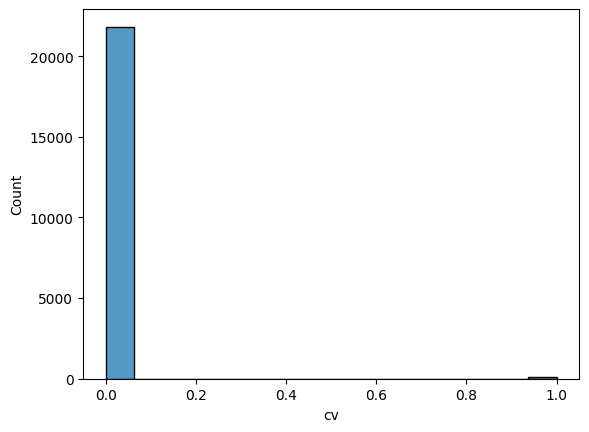

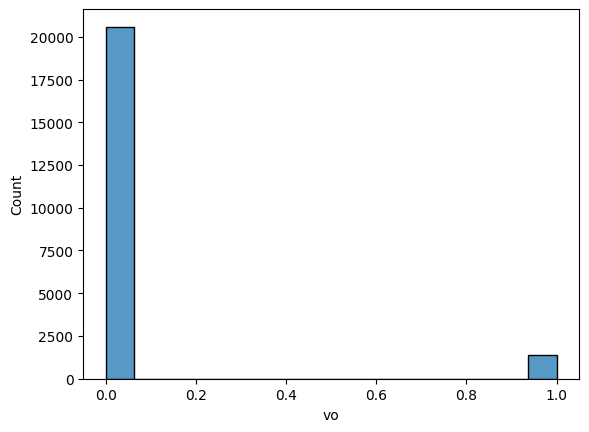

In [17]:
#histogram to understand the distribution of data
import warnings
warnings.filterwarnings("ignore")
for i in train_df.select_dtypes(include="number").columns:
    sns.histplot(data=train_df,x=i)
    plt.show()


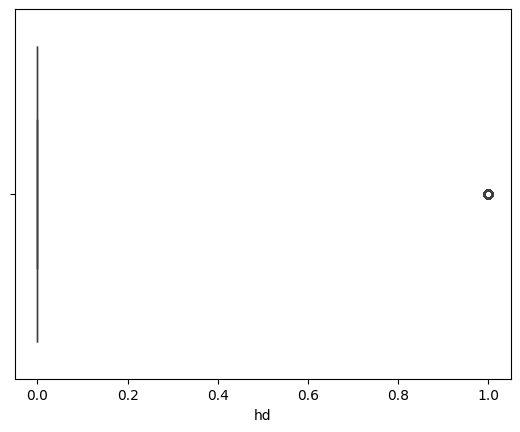

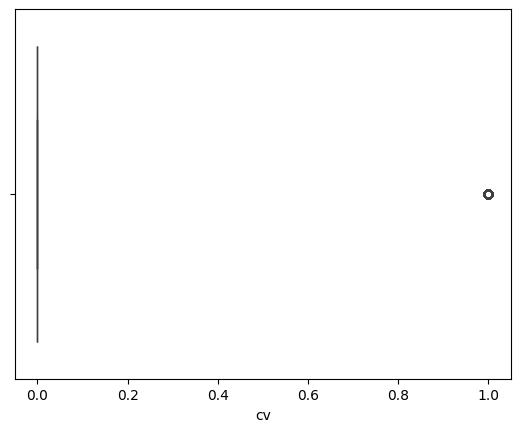

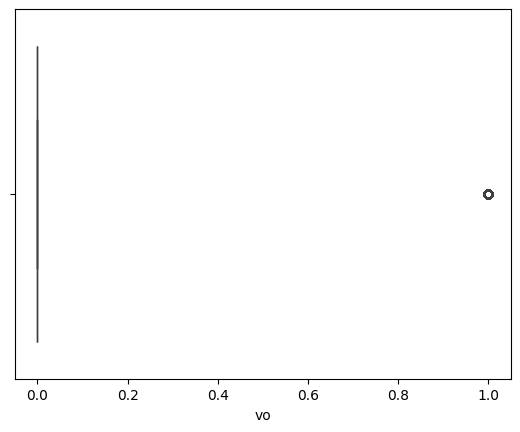

In [18]:
#boxplot to identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in train_df.select_dtypes(include="number").columns:
    sns.boxplot(data=train_df,x=i)
    plt.show()


In [29]:
# Remove punctuations and symbols
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

# Apply the function to all string cells in the DataFrame
train_df = train_df.applymap(remove_punctuation)
print(train_df.head())

                                                text  hd  cv  vo
0  He most likely converted to islam due to his n...   0   0   0
1  So Ford lied about being a psychologist Record...   0   0   0
2         Jobs Education Ending abuse of Nation CA43   0   0   0
3  I share a lot of your values  like many who do...   0   0   0
4  I am so ready to get back to blogging wwwbenbr...   0   0   0


In [31]:
import nltk
from nltk.tokenize import word_tokenize
# Download the necessary NLTK resources
nltk.download('punkt')
# Define a function to tokenize sentences
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    return text

# Apply the function to all cells in the DataFrame
train_df = train_df.applymap(tokenize_text)

# Display a few rows of the tokenized DataFrame
print(train_df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  hd  cv  vo
0  [He, most, likely, converted, to, islam, due, ...   0   0   0
1  [So, Ford, lied, about, being, a, psychologist...   0   0   0
2  [Jobs, Education, Ending, abuse, of, Nation, C...   0   0   0
3  [I, share, a, lot, of, your, values, like, man...   0   0   0
4  [I, am, so, ready, to, get, back, to, blogging...   0   0   0


In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#stopwords are commonly used words in a language that are often ignored  or filtered out in natural language processing
#tasks beacuase they carry less meaningful information compared to other words
# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

# Define a function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([word for word in words if word.lower() not in stop_words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(remove_stopwords)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
train_df_cleaned = pd.concat(train_processed_chunks, ignore_index=True)

# Process the test dataset in chunks
test_processed_chunks = []
for chunk in pd.read_csv(test_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    test_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for test data
test_df_cleaned = pd.concat(test_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned Train DataFrame:")
print(train_df_cleaned.head())

# Display a few rows of the cleaned test DataFrame
print("Cleaned Test DataFrame:")
print(test_df_cleaned.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'will', 'other', 'has', 'whom', "wasn't", 'haven', "couldn't", 'we', 'as', 'she', "doesn't", 'while', 's', 'for', 'to', 'he', "mustn't", 'their', 'should', 'just', 'our', 'than', "should've", 'isn', 'weren', 'and', 'they', 'are', 'about', 'few', "haven't", 'its', 'll', "needn't", 'was', 'out', 'below', 'am', 'won', "you'll", 'further', 'no', 'ma', 'i', 'my', 'her', 'each', 'ain', 'me', "it's", 'does', 'now', "that'll", 'again', 'such', "hadn't", 'same', 'is', 'themselves', 'very', "won't", 'shouldn', 'these', 'why', 'hasn', 'itself', 'can', 'that', 'when', 'himself', "she's", 'too', "aren't", "isn't", 'up', 'under', 'ourselves', 'doing', 'those', 'in', 'having', 'them', 'off', 'wasn', 'who', 'there', 'from', 'which', 'have', 'ours', 'so', 'but', 'before', 'it', 'after', 'yourselves', 'because', 'or', 'the', "hasn't", 'shan', 'all', 'y', "didn't", 'then', 'against', 'not', "shan't", "you're", "you've", 'your', 'on', 'what', 'over', 'most', 'myself', 'being', 'here', 'been', 'down', 'co

In [37]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#Stemming is an NLP technique used to reducce words to their base or root form. 
#for eg, the words "running", "runner", and "ran" can all be reduced to the stem "run"

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Define a function to perform stemming
def stem_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(stem_text)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976  
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
train_df= pd.concat(train_processed_chunks, ignore_index=True)

# Process the test dataset in chunks
test_processed_chunks = []
for chunk in pd.read_csv(test_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    test_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for test data
test_df = pd.concat(test_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned Train DataFrame:")
print(train_df.head())

# Display a few rows of the cleaned test DataFrame
print("Cleaned Test DataFrame:")
print(test_df.head())


Cleaned Train DataFrame:
                                                text  hd  cv  vo
0  he most like convert to islam due to hi natur ...   0   0   0
1  so ford lie about be a psychologist . record s...   0   0   0
2           job . educ . end abus of nation . ca43 .   0   0   0
3  i share a lot of your valu , & like mani who d...   0   0   0
4  i am so readi to get back to blog ! www.benbri...   0   0   0
Cleaned Test DataFrame:
                                                text  hd  cv  vo
0  http : //www.youtube.com/watch ? v=kacwpkaktak...   0   0   0
1  veri nice ! i tend to get tire of the constant...   0   0   0
2      watch today . http : //circumcisionmovie.com/   0   0   0
3  `` think venu `` first color layer block in fi...   0   0   0
4  what about death penalti for perpetr and expel...   0   0   0


In [39]:
#Lemmitization ia a NLP technique that invloves reducing words to thier base or dictionary form, known as the lemma. 
#eg: words: "running", "ran", "runs" ..... lemma:"run"
#eg: words: "better" (adjective).....lemma:"good"


import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization
def lemmatize_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([lemmatizer.lemmatize(word) for word in words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(lemmatize_text)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
train_df_cleaned = pd.concat(train_processed_chunks, ignore_index=True)

# Process the test dataset in chunks
test_processed_chunks = []
for chunk in pd.read_csv(test_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    test_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for test data
test_df_cleaned = pd.concat(test_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned Train DataFrame:")
print(train_df_cleaned.head())

# Display a few rows of the cleaned test DataFrame
print("Cleaned Test DataFrame:")
print(test_df_cleaned.head())



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned Train DataFrame:
                                                text  hd  cv  vo
0  He most likely converted to islam due to his n...   0   0   0
1  So Ford lied about being a psychologist . Reco...   0   0   0
2  Jobs . Education . Ending abuse of Nation . CA...   0   0   0
3  I share a lot of your value , & like many who ...   0   0   0
4  I am so ready to get back to blogging ! www.be...   0   0   0
Cleaned Test DataFrame:
                                                text  hd  cv  vo
0  http : //www.youtube.com/watch ? v=kACWpKAKtak...   0   0   0
1  Very nice ! I tend to get tired of the constan...   0   0   0
2      Watch today . http : //circumcisionmovie.com/   0   0   0
3  `` Thinking Venues `` First Color Layer blocki...   0   0   0
4  What about death penalty for perpetrator and e...   0   0   0


In [47]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# File paths (already provided and loaded)
train_file_path = r'F:\moVies\Springboard\data\ghc_train.tsv'
test_file_path = r'F:\moVies\Springboard\data\ghc_test.tsv'
train_df = pd.read_csv(train_file_path, sep='\t')
test_df = pd.read_csv(test_file_path, sep='\t')

# Combine train and test datasets
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Define a function to preprocess the text
def preprocess_text(text):
    if isinstance(text, str):
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize the text
        words = word_tokenize(text)
        # Remove stopwords and convert to lowercase
        words = [word.lower() for word in words if word.lower() not in stop_words]
        return words
    return []

# Apply preprocessing to the text column (assuming text column is named 'text')
combined_df['cleaned_text'] = combined_df['text'].apply(preprocess_text)

# Flatten the list of words
all_words = [word for words in combined_df['cleaned_text'] for word in words]

# Calculate word frequencies
word_freq = Counter(all_words)

# Display the most common words
common_words = word_freq.most_common(100)  # Adjust the number as needed
print(common_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('’', 2117), ('like', 1832), ('people', 1743), ('one', 1485), ('get', 1367), ('dont', 1358), ('trump', 1319), ('would', 1290), ('us', 1130), ('know', 1074), ('im', 989), ('time', 989), ('good', 986), ('think', 901), ('see', 882), ('right', 807), ('new', 800), ('want', 766), ('white', 756), ('go', 720), ('need', 706), ('even', 702), ('gab', 698), ('back', 697), ('going', 684), ('make', 673), ('never', 670), ('well', 650), ('way', 621), ('still', 581), ('really', 580), ('take', 575), ('”', 572), ('got', 568), ('“', 561), ('much', 556), ('say', 553), ('day', 545), ('twitter', 532), ('great', 531), ('world', 519), ('many', 511), ('cant', 495), ('could', 494), ('thats', 493), ('free', 488), ('shit', 471), ('jews', 466), ('first', 465), ('years', 461), ('man', 459), ('left', 458), ('also', 454), ('god', 453), ('thing', 446), ('love', 441), ('look', 436), ('news', 432), ('said', 425), ('america', 424), ('every', 422), ('today', 421), ('another', 418), ('president', 414), ('country', 412), ('

In [48]:
# Define high-frequency stereotypical words list for hate speech detection
stereotypical_words = ['fuck', 'black', 'women'] 
# Function to detect hate speech based on the provided definitions
def detect_hate_speech(text):
    # Initialize variables to track hate-based rhetoric
    hate_based_rhetoric = {
        'HD': False,  # Hate-Based Derogatory Language
        'CV': False,  # Calls for Violence
        'VO': False,  # Vulgarity/Offensive Language directed at an individual
        'SXO': False, # Sexual Orientation
        'RAE': False, # Racial or Ethnicity-based
        'EX': False   # Expressions of Hate
    }
    
    # Check for high-frequency stereotypical words
    for word in stereotypical_words:
        if word in text:
            hate_based_rhetoric['HD'] = True
            
    # Check for unnecessary labeling (example: "a Jew", "a Muslim", etc.)
    if re.search(r'\ba\s+\w+\b', text):
        hate_based_rhetoric['HD'] = True
    
    # Check for other hate-based rhetoric
    if re.search(r'\b(deported|thrown off a roof)\b', text):
        hate_based_rhetoric['CV'] = True
    if re.search(r'\b(muzzie)\b', text):
        hate_based_rhetoric['VO'] = True
    if re.search(r'\b(sexual orientation)\b', text):
        hate_based_rhetoric['SXO'] = True
    if re.search(r'\b(black|Muslim|middle easterner|africans)\b', text):
        hate_based_rhetoric['RAE'] = True
    if re.search(r'\b(hate)\b', text):
        hate_based_rhetoric['EX'] = True
    
    # Classify the text based on the presence of hate-based rhetoric
    if any(hate_based_rhetoric.values()):
        return 'h'  # Hate speech detected
    else:
        return 'nh' # Not hateful

# Apply text classification for hate speech detection
train_df['label'] = train_df['text'].apply(detect_hate_speech)
test_df['label'] = test_df['text'].apply(detect_hate_speech)

# Display data after classification
print("Data after classification:")
print(train_df[['text', 'label']].head())
print(test_df[['text', 'label']].head())

Data after classification:
                                                text label
0  He most likely converted to islam due to his n...     h
1  So Ford lied about being a psychologist. Recor...     h
2     Jobs. Education. Ending abuse of Nation. CA43.    nh
3  I share a lot of your values, & like many who ...     h
4  I am so ready to get back to blogging! www.ben...    nh
                                                text label
0  https://www.youtube.com/watch?v=kACWpKAKtak A ...    nh
1  Very nice! I tend to get tired of the constant...     h
2        Watch today. https://circumcisionmovie.com/    nh
3  " Thinking Venues " First Color Layer blocking...    nh
4  What about death penalty for perpetrators  and...     h
